In [1]:
import gym
import numpy as np
from random import choice
from tqdm import tqdm

import bao_game
from bao_game.envs.bao_utils import *

In [2]:
env = gym.make('Bao-v0')

C:\Users\L\AppData\Roaming\Python\Python37\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [12:08<00:00, 137.35it/s]

Average number of moves: 53.79607
Median number of moves: 39.0
Min number of moves: 3
Max number of moves: 557
Games with more than 150 moves: 5209 (5.209%)
Games lost because of an empty front row: 99410 (99.41%)


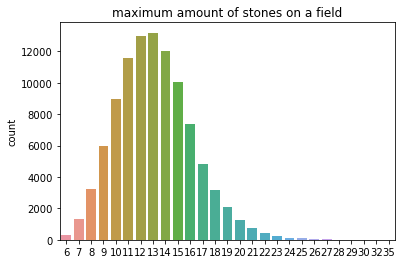

In [4]:
nb_moves = []
max_stones = []
nb_over150 = 0
empty_front_row = 0

for i in tqdm(range(100000)):
    env.reset()
    n = 0
    game_max = 0
    while not env.done:
        n += 1
        action = choice(get_available_actions(state=env.state))
        env.step(action)
        max_nb = np.max(env.state)
        game_max = max(game_max, max_nb)
    if np.max(env.state[1]) == 0:
        empty_front_row += 1
    if n > 150:
        nb_over150 += 1
    nb_moves.append(n)
    max_stones.append(game_max)


moves = np.asarray(nb_moves)

print("Average number of moves: " + str(np.average(moves)))
print("Median number of moves: " + str(np.median(moves)))
print("Min number of moves: " + str(moves.min()))
print("Max number of moves: " + str(moves.max()))
print("Games with more than 150 moves: " + str(nb_over150) + " (" + str(nb_over150 / 1000) + "%)")
print("Games lost because of an empty front row: " + str(empty_front_row) + " (" + str(empty_front_row / 1000) + "%)")

max_stones_series = pd.Series(max_stones)
plt.title('maximum amount of stones on a field')
sns.countplot(max_stones_series)